In [17]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt

    Extracting the number of sent emails present in the folders sent and _sent_mail for every author and storing the data in pandas dataframe

In [18]:
#Please insert path to the mail directory here
mail_dir = "./maildir/"
authors = os.listdir(mail_dir)
number_author_folders = len(authors)
extract_data =[]
for author in authors:
    try:
        number_sent_emails = len(os.listdir(mail_dir + author + "/_sent_mail"))
        extract_data.append([author, number_sent_emails, 1, 0])
    except FileNotFoundError as e:
        try:
            number_sent_emails = len(os.listdir(mail_dir + author + "/sent"))
            extract_data.append([author, number_sent_emails, 0, 1])
        except FileNotFoundError as e:
            pass
    except NotADirectoryError as e:
        pass
df = pd.DataFrame(extract_data, columns=["AuthorName", "NumberEmailsSent", "SentEmailFolder", "SentFolder"])
number_authors = df.shape[0]
number_authors

102

In [19]:
print("Percentage of authors that had a sent/sent_email folder = {}".format(number_authors/number_author_folders))
print("Number of authors where we use the SentEmailFolder = {}".format(len(df.loc[df["SentEmailFolder"]==1])))
print("Number of authors where we use the SentFolder = {}".format(len(df.loc[df["SentFolder"]==1])))
print("Total number of author folders {}".format(number_author_folders))



Percentage of authors that had a sent/sent_email folder = 0.6754966887417219
Number of authors where we use the SentEmailFolder = 78
Number of authors where we use the SentFolder = 24
Total number of author folders 151


Sorting dataframe based on the number of sent mails

In [20]:
df = df.sort_values(by="NumberEmailsSent", ascending=False)
%matplotlib qt 
# plt.plot(df["AuthorName"], df["NumberEmailsSent"])
# plt.show()

In [21]:
df[:10].tail(1)
#For 1st 10 authors the lowest NumberEmailsSent is 1632

,AuthorName,NumberEmailsSent,SentEmailFolder,SentFolder
16,sanders-r,1632,0,1


In [22]:
df[:15].tail(1)
#For 1st 15 authors the lowest NumberEmailsSent is 1315

,AuthorName,NumberEmailsSent,SentEmailFolder,SentFolder
93,kean-s,1315,0,1


In [23]:
df[:20].tail(1)
#For 1st 15 authors the lowest NumberEmailsSent is 991

,AuthorName,NumberEmailsSent,SentEmailFolder,SentFolder
55,scott-s,991,1,0


In [24]:
df[:25].tail(1)
#For 1st 25 authors the lowest NumberEmailsSent is 815

,AuthorName,NumberEmailsSent,SentEmailFolder,SentFolder
6,mcconnell-m,815,1,0


In [25]:
df[:20]

,AuthorName,NumberEmailsSent,SentEmailFolder,SentFolder
45,mann-k,4220,1,0
24,dasovich-j,3930,0,1
50,jones-t,3810,0,1
38,shackleton-s,3774,0,1
5,kaminski-v,3464,1,0
98,lenhart-m,1992,0,1
32,taylor-m,1862,0,1
30,perlingiere-d,1770,0,1
11,germany-c,1659,1,0
16,sanders-r,1632,0,1


In [26]:
df.loc[:20, ["AuthorName"]]

,AuthorName
45,mann-k
24,dasovich-j
50,jones-t
38,shackleton-s
5,kaminski-v
...,...
61,pereira-s
87,dorland-c
37,tycholiz-b
63,richey-c


Visualizing the distribution of sent mails accross the authors.

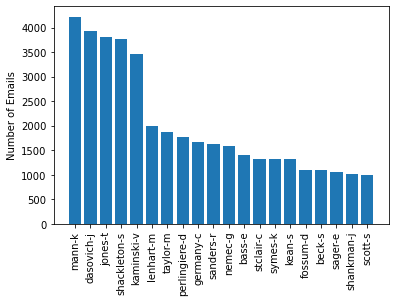

In [27]:
%matplotlib inline
plt.bar(df["AuthorName"][:20], df["NumberEmailsSent"][:20])
plt.ylabel("Number of Emails")
plt.xticks(df["AuthorName"][:20], rotation="vertical")
plt.show()